In [20]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('data/housing_train_data.csv')

# Print available features (columns) and their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Preprocess the dataset
# Select relevant features
features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 
    'LotArea', 'YearRemodAdd', 'GarageArea', 'OverallCond', 'Neighborhood'
]

# Remove rows with missing values
df = df[features + ['SalePrice']].dropna()

df.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,LotArea,YearRemodAdd,GarageArea,OverallCond,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1057.429452,1.565068,1971.267808,10516.828082,1984.865753,472.980137,5.575342,180921.195890
std,1.382997,525.480383,0.747315,438.705324,0.550916,30.202904,9981.264932,20.645407,213.804841,1.112799,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000,1300.000000,1950.000000,0.000000,1.000000,34900.000000
25%,5.000000,1129.500000,1.000000,795.750000,1.000000,1954.000000,7553.500000,1967.000000,334.500000,5.000000,129975.000000
50%,6.000000,1464.000000,2.000000,991.500000,2.000000,1973.000000,9478.500000,1994.000000,480.000000,5.000000,163000.000000
75%,7.000000,1776.750000,2.000000,1298.250000,2.000000,2000.000000,11601.500000,2004.000000,576.000000,6.000000,214000.000000
max,10.000000,5642.000000,4.000000,6110.000000,3.000000,2010.000000,215245.000000,2010.000000,1418.000000,9.000000,755000.000000


In [5]:
df["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [6]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Extract the "Neighborhood" column from the DataFrame
neighborhood_data = df[['Neighborhood']]

# Apply OneHotEncoder to the "Neighborhood" column
neighborhood_encoded = encoder.fit_transform(neighborhood_data)

# Convert to a dense array
neighborhood_encoded_dense = neighborhood_encoded.toarray()

# Create a DataFrame with the encoded neighborhood data
neighborhood_encoded_df = pd.DataFrame(neighborhood_encoded_dense, columns=encoder.get_feature_names_out(['Neighborhood']))

# Concatenate the encoded neighborhood DataFrame with the original DataFrame
df_encoded = pd.concat([df, neighborhood_encoded_df], axis=1)

# Drop the original "Neighborhood" column from the DataFrame
df_encoded.drop('Neighborhood', axis=1, inplace=True)

# Save encoded data to the DataFrame 
df = df_encoded

# Let's see the results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OverallQual           1460 non-null   int64  
 1   GrLivArea             1460 non-null   int64  
 2   GarageCars            1460 non-null   int64  
 3   TotalBsmtSF           1460 non-null   int64  
 4   FullBath              1460 non-null   int64  
 5   YearBuilt             1460 non-null   int64  
 6   LotArea               1460 non-null   int64  
 7   YearRemodAdd          1460 non-null   int64  
 8   GarageArea            1460 non-null   int64  
 9   OverallCond           1460 non-null   int64  
 10  SalePrice             1460 non-null   int64  
 11  Neighborhood_Blmngtn  1460 non-null   float64
 12  Neighborhood_Blueste  1460 non-null   float64
 13  Neighborhood_BrDale   1460 non-null   float64
 14  Neighborhood_BrkSide  1460 non-null   float64
 15  Neighborhood_ClearCr 

In [7]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)  # Exclude the 'SalePrice' column from features
y = df['SalePrice']

In [8]:
X

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,LotArea,YearRemodAdd,GarageArea,OverallCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,7,1710,2,856,2,2003,8450,2003,548,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,1262,2,1262,2,1976,9600,1976,460,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7,1786,2,920,2,2001,11250,2002,608,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,1717,3,756,1,1915,9550,1970,642,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2198,3,1145,2,2000,14260,2000,836,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999,7917,2000,460,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,6,2073,2,1542,2,1978,13175,1988,500,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,7,2340,1,1152,2,1941,9042,2006,252,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,5,1078,1,1078,1,1950,9717,1996,240,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [11]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# X_train and y_train is used to train our model
# X_test and y_test is used to test and evaluate our model

In [12]:
# Create linear regression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make predictions on the testing set
y_pred = regressor.predict(X_test)

y_pred.shape

(292,)

In [14]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 19927.622959566263
Mean Squared Error (MSE): 1182480620.460772
Root Mean Squared Error (RMSE): 34387.215945184806


In [21]:
 score = r2_score(y_test, y_pred)*100
 score

81.13142539889017

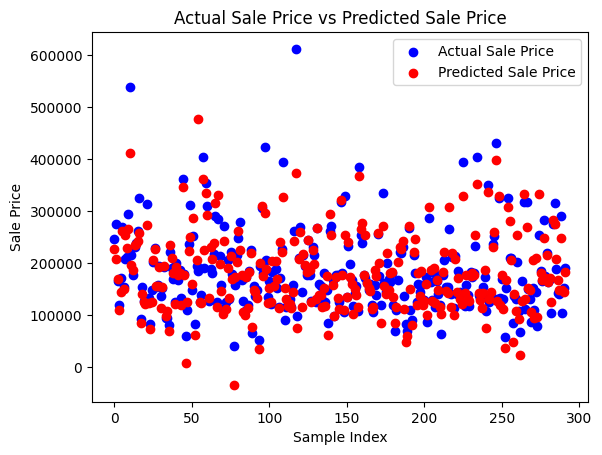

In [15]:
# Plotting the sale price
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Sale Price')
# Plotting the predictions
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Sale Price')

plt.title('Actual Sale Price vs Predicted Sale Price')
plt.xlabel('Sample Index')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

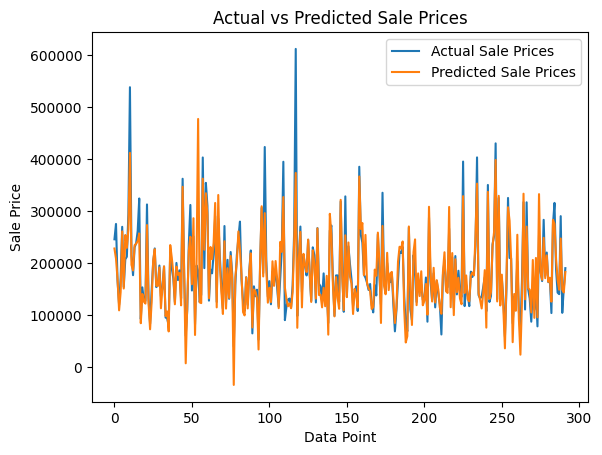

In [16]:
plt.plot(range(len(y_test)), y_test, label='Actual Sale Prices')
plt.plot(range(len(y_test)), y_pred, label='Predicted Sale Prices')
plt.xlabel('Data Point')
plt.ylabel('Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.legend()
plt.show()

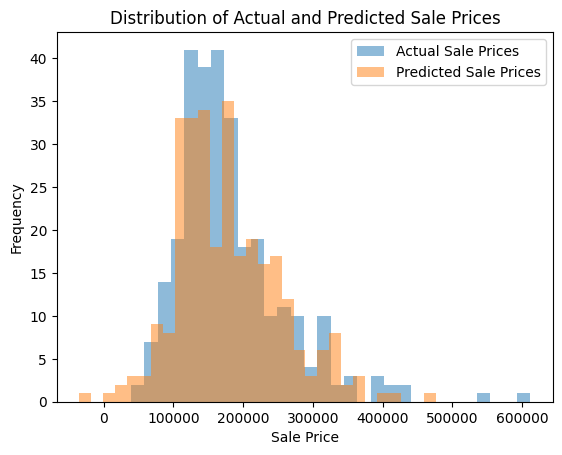

In [17]:
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Sale Prices')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Sale Prices')
plt.legend()
plt.show()

C:\Users\faruk\AppData\Local\Temp\ipykernel_29136\3529091231.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([y_test, y_pred], labels=['Actual', 'Predicted'])


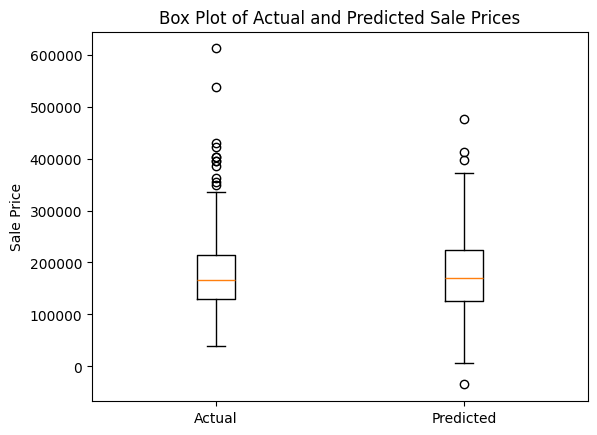

In [18]:
plt.boxplot([y_test, y_pred], labels=['Actual', 'Predicted'])
plt.ylabel('Sale Price')
plt.title('Box Plot of Actual and Predicted Sale Prices')
plt.show()

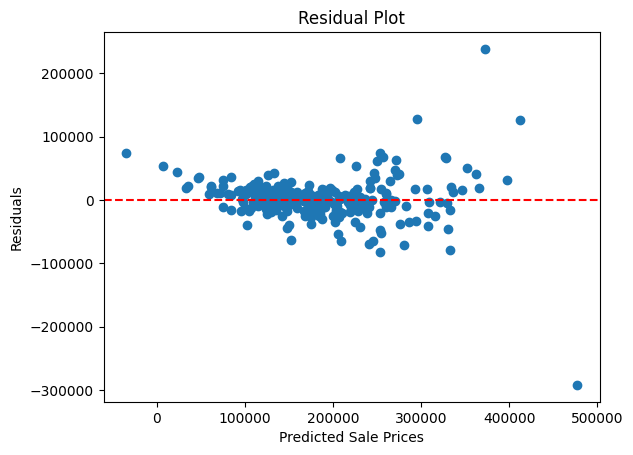

In [19]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Sale Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()